In [1]:
# Importing the modules and libraries
# Additional libraries should be imported in this cell for organization

import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Input
from tensorflow.keras.layers import Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [3]:
# Reading the dataset and creating a dataframe

dataset = pd.read_csv("TypicalMeteorologicalData.csv", skiprows=16, skipfooter=12)
df = pd.DataFrame(dataset)

C:\Users\ugurhan\AppData\Local\Temp\ipykernel_26388\1875562057.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dataset = pd.read_csv("TypicalMeteorologicalData.csv", skiprows=16, skipfooter=12)


# Explanations of the Variables
<b>T2m:</b> 2-m air temperature (degree Celsius) <br>
<b>RH:</b> relative humidity (%) <br>
<b>G(h):</b> Global irradiance on the horizontal plane (W/m2) <br>
<b>Gb(n):</b> Beam/direct irradiance on a plane always normal to sun rays (W/m2) <br>
<b>Gd(h):</b> Diffuse irradiance on the horizontal plane (W/m2) <br>
<b>IR(h):</b> Surface infrared (thermal) irradiance on a horizontal plane (W/m2) <br>
<b>WS10m:</b> 10-m total wind speed (m/s) <br>
<b>WD10m:</b> 10-m wind direction (0 = N, 90 = E) (degree) <br>
<b>SP:</b> Surface (air) pressure (Pa)

In [4]:
df

,time(UTC),T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
0,20090101:0000,1.04,92.26,0.0,-0.0,0.0,276.22,2.95,29.0,101368.0
1,20090101:0100,0.41,92.19,0.0,-0.0,0.0,275.32,2.69,41.0,101348.0
2,20090101:0200,-0.21,92.11,0.0,-0.0,0.0,274.41,2.42,50.0,101338.0
3,20090101:0300,-0.84,92.03,0.0,-0.0,0.0,273.50,2.16,26.0,101368.0
4,20090101:0400,-1.46,91.95,0.0,-0.0,0.0,272.60,1.90,327.0,101408.0
...,...,...,...,...,...,...,...,...,...,...
8755,20051231:1900,4.16,92.65,0.0,-0.0,0.0,280.76,4.26,224.0,98610.0
8756,20051231:2000,3.54,92.58,0.0,-0.0,0.0,279.85,4.00,224.0,98610.0
8757,20051231:2100,2.91,92.50,0.0,-0.0,0.0,278.94,3.74,226.0,98640.0
8758,20051231:2200,2.29,92.42,0.0,-0.0,0.0,278.04,3.48,226.0,98650.0


In [ ]:
# Since the main dataset has random year values, the only sequential part of the data is selected for training
# The data comprises a two month interval, from 2009 June to July.

df_2009 = df.iloc[3625:5088]

df_2009 = df_2009.reset_index(drop=True)

df_2009

,time(UTC),T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
0,20090601:0100,13.47,72.84,0.0,-0.00,0.0,307.30,2.90,28.0,100771.0
1,20090601:0200,13.46,75.95,0.0,-0.00,0.0,307.40,2.75,31.0,100751.0
2,20090601:0300,13.45,79.05,0.0,-0.00,0.0,307.50,2.60,35.0,100771.0
3,20090601:0400,13.44,82.16,15.0,97.71,11.0,307.60,2.45,38.0,100781.0
4,20090601:0500,13.43,85.26,140.0,411.59,61.0,307.69,2.30,40.0,100811.0
...,...,...,...,...,...,...,...,...,...,...
1458,20090731:1900,20.10,47.45,11.0,0.00,11.0,347.71,1.62,98.0,100452.0
1459,20090731:2000,19.94,50.92,0.0,-0.00,0.0,346.48,1.76,102.0,100462.0
1460,20090731:2100,19.79,54.38,0.0,-0.00,0.0,345.25,1.91,103.0,100432.0
1461,20090731:2200,19.64,57.84,0.0,-0.00,0.0,344.03,2.05,107.0,100412.0


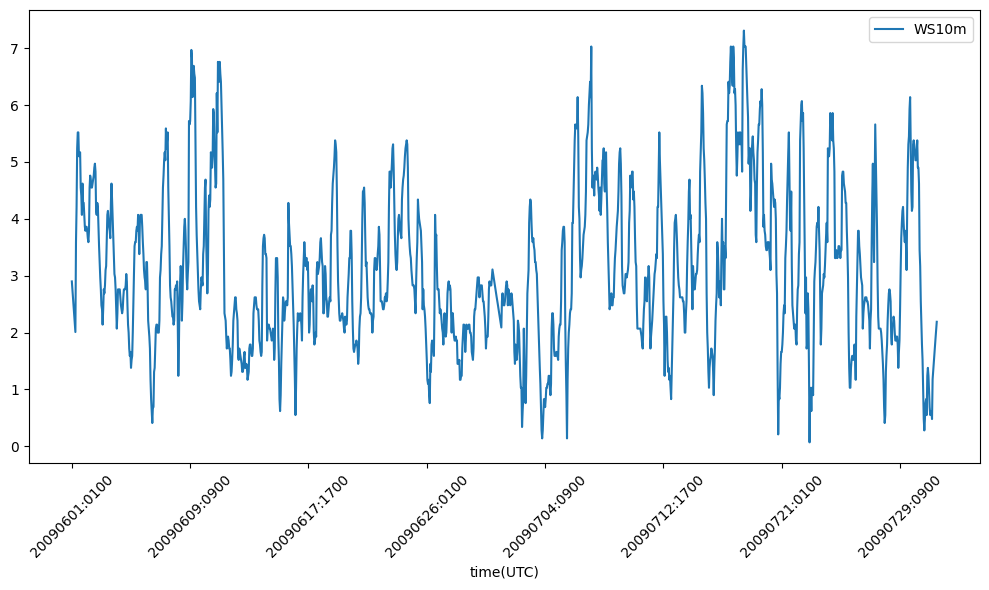

In [6]:
# Example line plot of 10-m total wind speed with respect to time

# Plot the line chart
ax = df_2009.plot(x='time(UTC)', y='WS10m', kind='line', figsize=(10, 6))

# Adjust x-axis ticks to display fewer labels
xtick_positions = ax.get_xticks()  # Get the default tick positions

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [7]:
# Drop time column to convert all values to floating point values
# More suitable for modeling with a neural network

df_2009_timeless = df_2009.drop(['time(UTC)'], axis=1)

# Wind Speed Prediction

In [8]:
df_2009_windspeed = df_2009_timeless.iloc[:, [6]]

df_2009_windspeed

,WS10m
0,2.90
1,2.75
2,2.60
3,2.45
4,2.30
...,...
1458,1.62
1459,1.76
1460,1.91
1461,2.05


In [9]:
# Preparing dataset for LSTM training

df_lstm = df_2009_windspeed.values
df_lstm = df_lstm.astype('float32')

In [10]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

In [11]:
# split into train and test sets

train_size = int(len(df_lstm) * 0.80)
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

1170 293


In [12]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t and Y=t+1

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
np.shape(trainX)

(1168, 1, 1)

In [16]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1168/1168 - 5s - 5ms/step - loss: 0.0426
Epoch 2/25
1168/1168 - 3s - 3ms/step - loss: 0.0094
Epoch 3/25
1168/1168 - 3s - 3ms/step - loss: 0.0033
Epoch 4/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 5/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 6/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 7/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 8/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 9/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 10/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 11/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 12/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 13/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 14/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 15/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 16/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 17/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 18/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Epoch 19/25
1168/1168 - 3s - 3ms/step - loss: 0.0029
Ep

In [17]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Train Score: 0.38 RMSE
Test Score: 0.49 RMSE


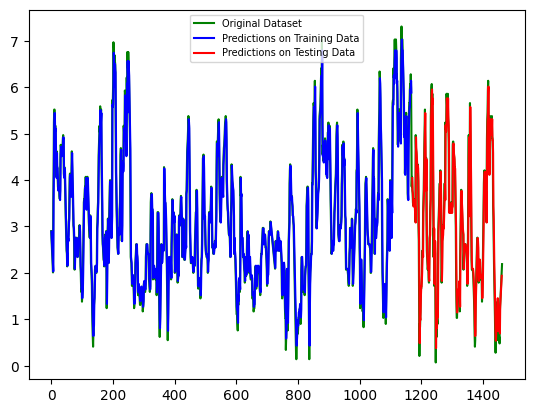

In [18]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)
plt.show()

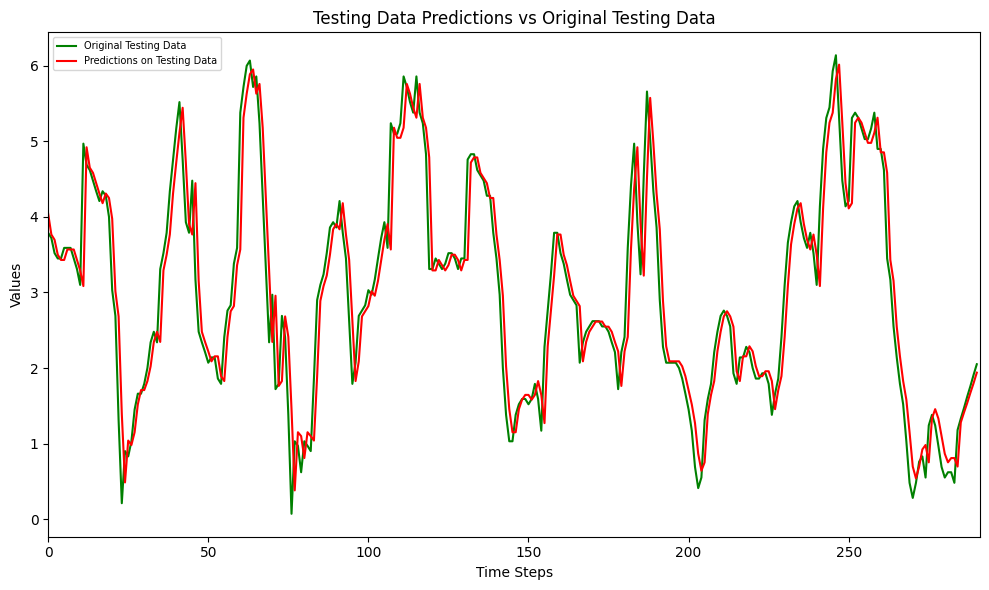

In [19]:
# Looking at the testing data closer

# Define the start and end of the testing data
test_start = len(trainPredict) + (look_back * 2) + 1
test_end = len(df_lstm) - 1

# Extract the original testing data
original_test_data = scaler.inverse_transform(df_lstm)[test_start:test_end]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[test_start:test_end, :] = testPredict

# Plot only the testing predictions and original testing data
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
plt.plot(original_test_data, 'g', label='Original Testing Data')  # Original test data
plt.plot(testPredict, 'r', label='Predictions on Testing Data')   # Test predictions

# Zoom in on the testing portion
plt.xlim(0, len(original_test_data))  # Limit x-axis to the testing range
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Testing Data Predictions vs Original Testing Data")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()


# Forecasting Future Data (First Attempts)
The data for the date of July 31st will be omitted for training, and the model will be asked to forecast that day's wind speed. <br>
The code is converted to markdown for now for swift execution of the codes.

In [26]:
df_2009_windspeed = df_2009_timeless.iloc[:, [6]]

df_2009_windspeed

,WS10m
0,2.90
1,2.75
2,2.60
3,2.45
4,2.30
...,...
1458,1.62
1459,1.76
1460,1.91
1461,2.05


In [27]:
df_2009_to_forecast = df_2009_windspeed.iloc[-24:]

In [28]:
df_2009_to_forecast = df_2009_to_forecast.reset_index(drop=True)

In [29]:
df_2009_to_forecast

,WS10m
0,1.03
1,0.48
2,0.28
3,0.48
4,0.76
5,0.83
6,0.55
7,1.24
8,1.38
9,1.24


In [30]:
df_2009_to_train = df_2009_windspeed.iloc[:-24]

df_2009_to_train

,WS10m
0,2.90
1,2.75
2,2.60
3,2.45
4,2.30
...,...
1434,3.17
1435,2.55
1436,2.14
1437,1.79


In [31]:
# Preparing dataset for LSTM training

df_lstm = df_2009_to_train.values
df_lstm = df_lstm.astype('float32')

In [32]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

# split into train and test sets

train_size = int(len(df_lstm) * 0.80)
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# reshape into X=t and Y=t+1

look_back = 50
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

np.shape(trainX)

# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)
plt.show()

# Looking at the testing data closer

# Define the start and end of the testing data
test_start = len(trainPredict) + (look_back * 2) + 1
test_end = len(df_lstm) - 1

# Extract the original testing data
original_test_data = scaler.inverse_transform(df_lstm)[test_start:test_end]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[test_start:test_end, :] = testPredict

# Plot only the testing predictions and original testing data
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
plt.plot(original_test_data, 'g', label='Original Testing Data')  # Original test data
plt.plot(testPredict, 'r', label='Predictions on Testing Data')   # Test predictions

# Zoom in on the testing portion
plt.xlim(0, len(original_test_data))  # Limit x-axis to the testing range
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Testing Data Predictions vs Original Testing Data")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()


# Step 1: Prepare the last look_back window as input
look_back = 50  # Replace this with the value of 'look_back' used in your training
last_known_input = testX[-look_back:]  # Last input window from training data
forecast_input = last_known_input.reshape(look_back, 1, look_back)  # Reshape for LSTM input

# Step 2: Forecast for the next 24 hours
forecast = []  # List to store predictions

for _ in range(24):  # Predict the next 24 time steps
    # Predict the next value
    next_prediction = model.predict(forecast_input, verbose=0)
    forecast.append(next_prediction[0, 0])  # Append the prediction

    # Update the input for the next timestep
    # Shift input window and include the latest prediction
    forecast_input = np.append(forecast_input[0, 0, 1:], next_prediction[0, 0])
    forecast_input = forecast_input.reshape(1, 1, look_back)  # Reshape again for LSTM

# Step 3: Inverse transform the predictions to the original scale
forecast = np.array(forecast).reshape(-1, 1)  # Reshape for scaler
forecast_original_scale = scaler.inverse_transform(forecast)

# Step 4: Plot the forecasted wind speed data
plt.figure(figsize=(10, 6))
plt.plot(forecast_original_scale, 'r-', label='Forecasted Wind Speed (July 31, 2009)')
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Speed')
plt.title('24-Hour Wind Speed Forecast for July 31 August 2009')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(forecast_original_scale, 'r-', label='Forecasted Wind Speed (July 31, 2009)')
plt.plot(df_2009_to_forecast, 'b', label='The Actual Wind Speed (July 31, 2009)')
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Speed')

Different parameters were tested with the model, and the accuracy of the forecasting was deemed not optimal. <br>
Therefore, it is necessary to find other ways of incorporating LSTM for forecasting. <br>
If other methods fail to show promising results with the LSTM model, it might be necessary to search for other models.

# Forecasting Future Data (Second Attempt)

In [89]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# define input sequence
df_2009_to_forecast = df_2009_windspeed.iloc[-293:]
df_2009_to_forecast = df_2009_to_forecast.reset_index(drop=True)
df_2009_to_train = df_2009_windspeed.iloc[:-293]

df_lstm = df_2009_to_train.values
df_lstm = df_lstm.astype('float32')

raw_seq = df_lstm

# choose a number of time steps
n_steps = 20

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[[2.9 ]
 [2.75]
 [2.6 ]
 [2.45]
 [2.3 ]
 [2.16]
 [2.01]
 [3.59]
 [4.21]
 [5.24]
 [5.52]
 [5.52]
 [5.1 ]
 [5.17]
 [5.17]
 [4.55]
 [4.41]
 [4.07]
 [4.62]
 [4.28]] [4.28]
[[2.75]
 [2.6 ]
 [2.45]
 [2.3 ]
 [2.16]
 [2.01]
 [3.59]
 [4.21]
 [5.24]
 [5.52]
 [5.52]
 [5.1 ]
 [5.17]
 [5.17]
 [4.55]
 [4.41]
 [4.07]
 [4.62]
 [4.28]
 [4.28]] [4.07]
[[2.6 ]
 [2.45]
 [2.3 ]
 [2.16]
 [2.01]
 [3.59]
 [4.21]
 [5.24]
 [5.52]
 [5.52]
 [5.1 ]
 [5.17]
 [5.17]
 [4.55]
 [4.41]
 [4.07]
 [4.62]
 [4.28]
 [4.28]
 [4.07]] [3.86]
[[2.45]
 [2.3 ]
 [2.16]
 [2.01]
 [3.59]
 [4.21]
 [5.24]
 [5.52]
 [5.52]
 [5.1 ]
 [5.17]
 [5.17]
 [4.55]
 [4.41]
 [4.07]
 [4.62]
 [4.28]
 [4.28]
 [4.07]
 [3.86]] [3.79]
[[2.3 ]
 [2.16]
 [2.01]
 [3.59]
 [4.21]
 [5.24]
 [5.52]
 [5.52]
 [5.1 ]
 [5.17]
 [5.17]
 [4.55]
 [4.41]
 [4.07]
 [4.62]
 [4.28]
 [4.28]
 [4.07]
 [3.86]
 [3.79]] [3.86]
[[2.16]
 [2.01]
 [3.59]
 [4.21]
 [5.24]
 [5.52]
 [5.52]
 [5.1 ]
 [5.17]
 [5.17]
 [4.55]
 [4.41]
 [4.07]
 [4.62]
 [4.28]
 [4.28]
 [4.07]
 [3.86]
 [3.79]
 [3.86]]

First, testing LSTM for univariate time series forecasting.

In [90]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features))))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=2)

Epoch 1/300


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 - 6s - 171ms/step - loss: 3.0662
Epoch 2/300
36/36 - 1s - 35ms/step - loss: 0.5786
Epoch 3/300
36/36 - 1s - 36ms/step - loss: 0.3886
Epoch 4/300
36/36 - 1s - 36ms/step - loss: 0.3711
Epoch 5/300
36/36 - 1s - 35ms/step - loss: 0.2783
Epoch 6/300
36/36 - 1s - 35ms/step - loss: 0.2367
Epoch 7/300
36/36 - 1s - 35ms/step - loss: 0.2081
Epoch 8/300
36/36 - 1s - 33ms/step - loss: 0.1977
Epoch 9/300
36/36 - 1s - 34ms/step - loss: 0.1903
Epoch 10/300
36/36 - 1s - 35ms/step - loss: 0.1636
Epoch 11/300
36/36 - 1s - 34ms/step - loss: 0.1414
Epoch 12/300
36/36 - 1s - 34ms/step - loss: 0.1352
Epoch 13/300
36/36 - 1s - 33ms/step - loss: 0.1329
Epoch 14/300
36/36 - 1s - 33ms/step - loss: 0.1316
Epoch 15/300
36/36 - 1s - 35ms/step - loss: 0.1299
Epoch 16/300
36/36 - 1s - 33ms/step - loss: 0.1294
Epoch 17/300
36/36 - 1s - 35ms/step - loss: 0.1293
Epoch 18/300
36/36 - 1s - 35ms/step - loss: 0.1287
Epoch 19/300
36/36 - 1s - 35ms/step - loss: 0.1282
Epoch 20/300
36/36 - 1s - 35ms/step - loss: 0.1285


In [22]:
# Prediction demonstration
x_input = array(df_2009_to_forecast[0:n_steps])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

print(x_input)
print(yhat)

ValueError: cannot reshape array of size 24 into shape (1,40,1)

In [91]:
# Getting the forecasting predictions

prediction_list = [] # Initialize empty array to store predictions

# Extracting float values from the nested structure
to_forecast_values = [item[0] for item in df_lstm[-n_steps:]]

# Feeding the model the initial data
for i in range(n_steps):

    prediction_list.append(to_forecast_values[i])

for i in range(293):

    x_input = array(prediction_list[i:i+n_steps])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)

    prediction_list.append(yhat[0][0])

In [92]:
filtered_float_values = prediction_list[n_steps:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(filtered_float_values, df_2009_to_forecast))

# Print RMSE
print("RMSE:", rmse)

RMSE: 2.062115817027343


Text(0.5, 1.0, 'Forecasting the Windspeed with look_back = 20 with Bidirectional & Stacked LSTM')

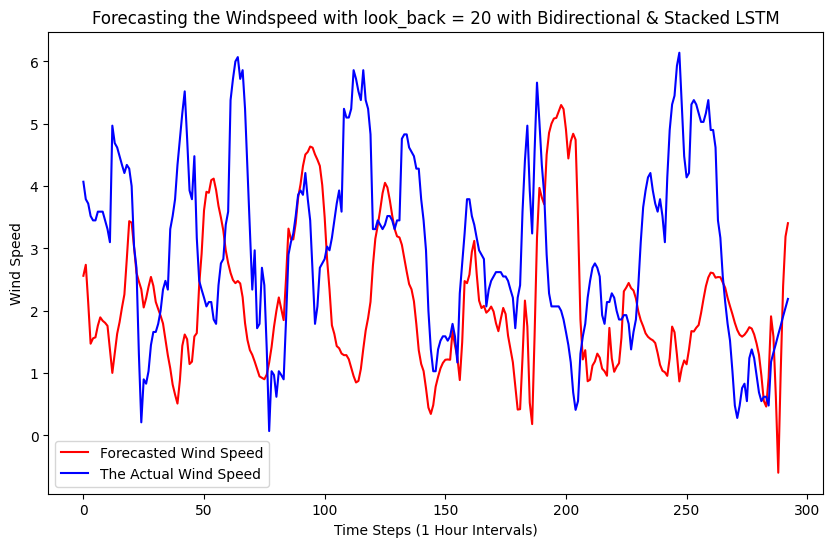

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_float_values, 'r-', label='Forecasted Wind Speed')
plt.plot(df_2009_to_forecast, 'b', label='The Actual Wind Speed')
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Speed')
plt.legend()
plt.title("Forecasting the Windspeed with look_back = " + str(n_steps) + " with Bidirectional & Stacked LSTM")

Text(0.5, 1.0, 'Forecasting the Windspeed of the first 24 hours with look_back = 20 with Bidirectional & Stacked LSTM')

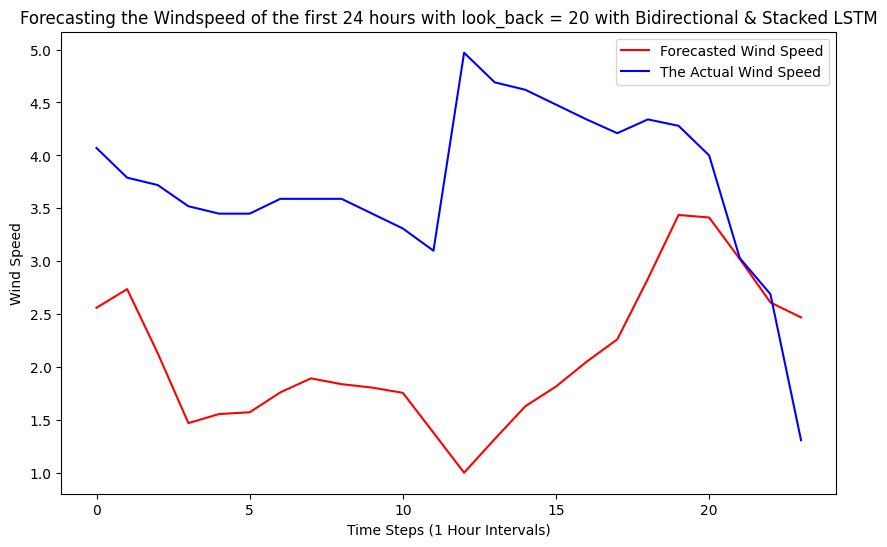

In [97]:
# Plotting the first 24 hours of predictions

plt.figure(figsize=(10, 6))
plt.plot(filtered_float_values[:24], 'r-', label='Forecasted Wind Speed')
plt.plot(df_2009_to_forecast[:24], 'b', label='The Actual Wind Speed')
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Speed')
plt.legend()
plt.title("Forecasting the Windspeed of the first 24 hours with look_back = " + str(n_steps) + " with Bidirectional & Stacked LSTM")

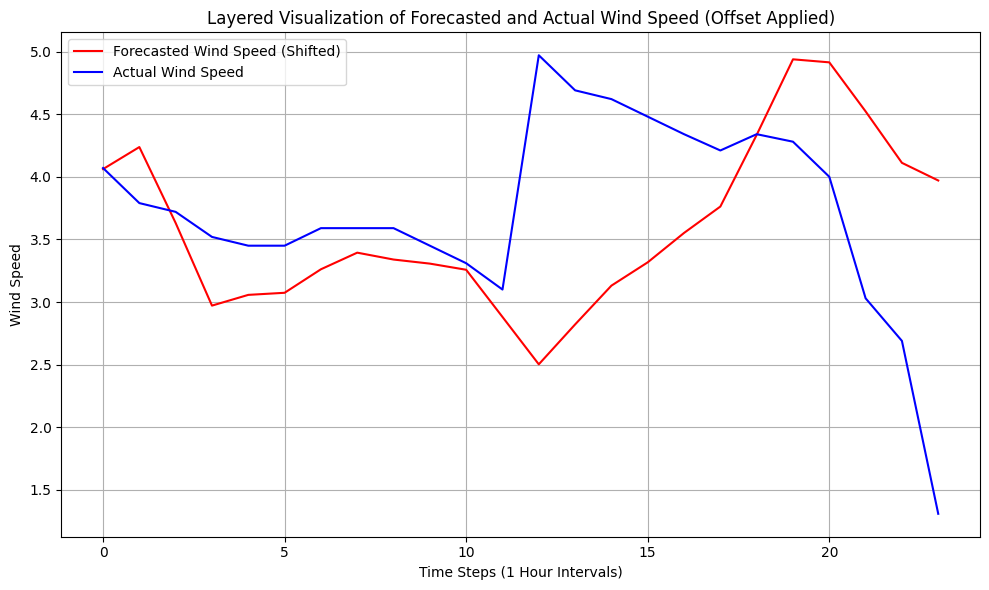

In [99]:
# Define an offset value for visualization
offset = 1.5  # Adjust this value as needed to create sufficient separation

# Plot the graphs with the offset applied to the forecasted values
plt.figure(figsize=(10, 6))
plt.plot([v + offset for v in filtered_float_values[:24]], 'r-', label='Forecasted Wind Speed (Shifted)')  # Shift the forecasted line
plt.plot(df_2009_to_forecast[:24], 'b-', label='Actual Wind Speed')  # Original data
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Speed')
plt.legend()
plt.title("Layered Visualization of Forecasted and Actual Wind Speed (Offset Applied)")
plt.grid()
plt.tight_layout()
plt.show()


The first forecasting tests were done with the actual data taken as inputs. When the model takes accurate results as inputs, it can accurately predict the next output i.e. in our cases, the sixth hour's windspeed. <br>
<br>
When the model is only fed with the initial data, and is then tasked with creating predictions for future data, being fed its own predictions as guidance, it starts giving skewed data, as hypothesized. The problem is the fact that the inacurracy increases drastically, making the model unoptimal for usage. <br>
Continued tests show improved forecasting results with more populated data, but the predictions still cannot reach optimal results regarding their numerical values, only their trend predictions.

# Predicting 2009 April Wind Speed With Trained Model

In [57]:
df_2009_april = df.iloc[2161:2880]

df_2009_april = df_2009_april.reset_index(drop=True)

df_2009_april

,time(UTC),T2m,RH,G(h),Gb(n),Gd(h),IR(h),WS10m,WD10m,SP
0,20090401:0100,6.87,74.45,0.0,-0.0,0.0,265.44,3.91,32.0,100562.0
1,20090401:0200,5.93,76.00,0.0,-0.0,0.0,258.78,3.84,29.0,100502.0
2,20090401:0300,4.99,77.56,0.0,-0.0,0.0,252.12,3.76,26.0,100472.0
3,20090401:0400,4.06,79.12,0.0,-0.0,0.0,245.45,3.68,26.0,100452.0
4,20090401:0500,3.12,80.68,0.0,-0.0,0.0,238.79,3.61,28.0,100472.0
...,...,...,...,...,...,...,...,...,...,...
714,20090430:1900,13.84,66.40,0.0,-0.0,0.0,324.94,1.71,97.0,100472.0
715,20090430:2000,13.51,68.77,0.0,-0.0,0.0,320.92,1.87,94.0,100562.0
716,20090430:2100,13.18,71.14,0.0,-0.0,0.0,316.90,2.03,96.0,100592.0
717,20090430:2200,12.85,73.51,0.0,-0.0,0.0,312.88,2.19,96.0,100621.0


In [58]:
df_2009_april_timeless = df_2009_april.drop(['time(UTC)'], axis=1)

df_2009_windspeed_april = df_2009_april_timeless.iloc[:, [6]]

df_2009_windspeed_april

,WS10m
0,3.91
1,3.84
2,3.76
3,3.68
4,3.61
...,...
714,1.71
715,1.87
716,2.03
717,2.19


In [59]:
# Preparing dataset for LSTM training

df_lstm = df_2009_windspeed_april.values
df_lstm = df_lstm.astype('float32')

In [60]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

In [61]:
# split into train and test sets

train_size = int(len(df_lstm) * 0.80)
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

575 144


In [70]:
# reshape into X=t and Y=t+1

look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [71]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [72]:
np.shape(trainX)

(474, 1, 100)

In [73]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Train Score: 0.47 RMSE
Test Score: 0.50 RMSE


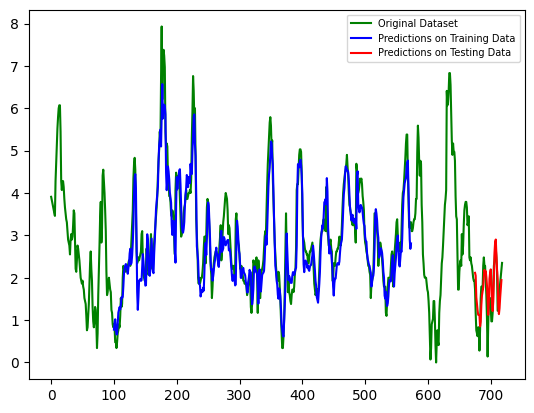

In [74]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)
plt.show()

# Predicting Global Irradiance With Trained Model
Our hypothesis is that, since the model was trained with wind speed data, it should not perform well in predicting global horizontal irradiance.

In [75]:
df_2009_gh_april = df_2009_april_timeless.iloc[:, [2]]

df_2009_gh_april

,G(h)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
714,0.0
715,0.0
716,0.0
717,0.0


In [76]:
# Preparing dataset for LSTM training

df_lstm = df_2009_gh_april.values
df_lstm = df_lstm.astype('float32')

In [77]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

In [78]:
# split into train and test sets

train_size = int(len(df_lstm) * 0.80)
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

575 144


In [79]:
# reshape into X=t and Y=t+1

look_back = 100
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [80]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [81]:
np.shape(trainX)

(474, 1, 100)

In [82]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Train Score: 127.96 RMSE
Test Score: 130.43 RMSE


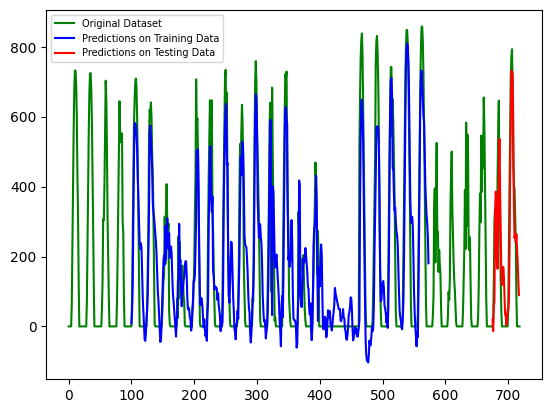

In [83]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)
plt.show()

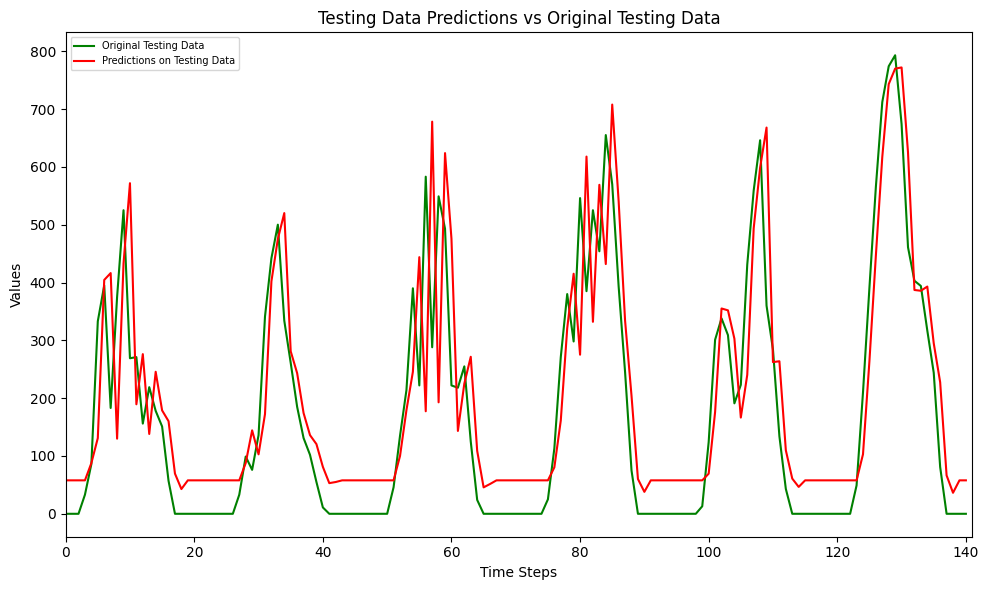

In [ ]:
# Looking at the testing data closer

# Define the start and end of the testing data
test_start = len(trainPredict) + (look_back * 2) + 1
test_end = len(df_lstm) - 1

# Extract the original testing data
original_test_data = scaler.inverse_transform(df_lstm)[test_start:test_end]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[test_start:test_end, :] = testPredict

# Plot only the testing predictions and original testing data
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
plt.plot(original_test_data, 'g', label='Original Testing Data')  # Original test data
plt.plot(testPredict, 'r', label='Predictions on Testing Data')   # Test predictions

# Zoom in on the testing portion
plt.xlim(0, len(original_test_data))  # Limit x-axis to the testing range
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Testing Data Predictions vs Original Testing Data")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()


# Global Horizontal Irradiation - Model Training and Prediction

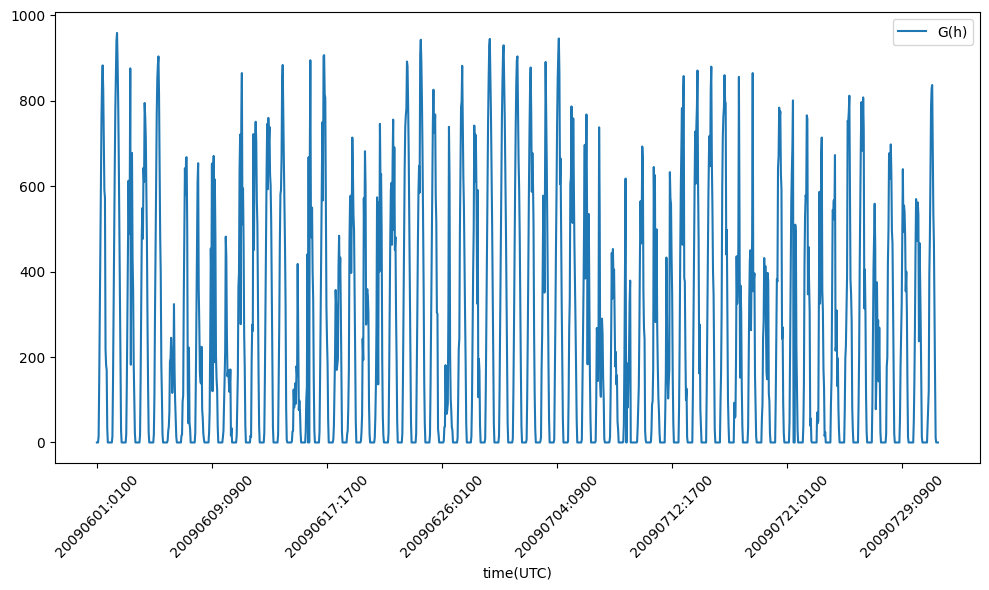

In [20]:
# Example line plot of global horizontal irradiance with respect to time on a typical year

# Plot the line chart
ax = df_2009.plot(x='time(UTC)', y='G(h)', kind='line', figsize=(10, 6))

# Adjust x-axis ticks to display fewer labels
xtick_positions = ax.get_xticks()  # Get the default tick positions

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [21]:
df_2009_irradiance = df_2009_timeless.iloc[:, [2]]

df_2009_irradiance

,G(h)
0,0.0
1,0.0
2,0.0
3,15.0
4,140.0
...,...
1458,11.0
1459,0.0
1460,0.0
1461,0.0


In [22]:
# Preparing dataset for LSTM training

df_lstm = df_2009_irradiance.values
df_lstm = df_lstm.astype('float32')

In [23]:
# normalize the dataset

scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm = scaler.fit_transform(df_lstm)

In [24]:
# split into train and test sets

train_size = int(len(df_lstm) * 0.80)
test_size = len(df_lstm) - train_size
train, test = df_lstm[0:train_size,:], df_lstm[train_size:len(df_lstm),:]
print(len(train), len(test))

1170 293


In [25]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [26]:
# reshape into X=t and Y=t+1

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [27]:
# reshape input to be [samples, time steps, features]

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
np.shape(trainX)

(1168, 1, 1)

In [29]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)

Epoch 1/25


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1168/1168 - 5s - 4ms/step - loss: 0.0721
Epoch 2/25
1168/1168 - 3s - 3ms/step - loss: 0.0204
Epoch 3/25
1168/1168 - 3s - 3ms/step - loss: 0.0187
Epoch 4/25
1168/1168 - 3s - 3ms/step - loss: 0.0186
Epoch 5/25
1168/1168 - 3s - 3ms/step - loss: 0.0185
Epoch 6/25
1168/1168 - 3s - 3ms/step - loss: 0.0185
Epoch 7/25
1168/1168 - 3s - 3ms/step - loss: 0.0184
Epoch 8/25
1168/1168 - 3s - 3ms/step - loss: 0.0184
Epoch 9/25
1168/1168 - 3s - 3ms/step - loss: 0.0184
Epoch 10/25
1168/1168 - 3s - 3ms/step - loss: 0.0183
Epoch 11/25
1168/1168 - 3s - 3ms/step - loss: 0.0183
Epoch 12/25
1168/1168 - 3s - 3ms/step - loss: 0.0183
Epoch 13/25
1168/1168 - 3s - 3ms/step - loss: 0.0183
Epoch 14/25
1168/1168 - 4s - 3ms/step - loss: 0.0182
Epoch 15/25
1168/1168 - 3s - 3ms/step - loss: 0.0182
Epoch 16/25
1168/1168 - 3s - 3ms/step - loss: 0.0182
Epoch 17/25
1168/1168 - 3s - 3ms/step - loss: 0.0182
Epoch 18/25
1168/1168 - 3s - 3ms/step - loss: 0.0182
Epoch 19/25
1168/1168 - 3s - 3ms/step - loss: 0.0182
Epoch 20/25
1

In [30]:
# make predictions

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error

trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Train Score: 128.50 RMSE
Test Score: 121.47 RMSE


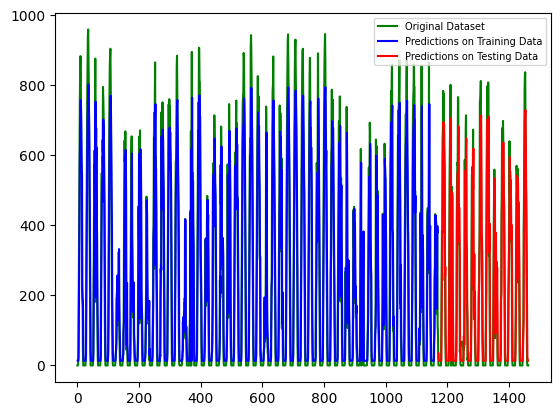

In [31]:
# shift train predictions for plotting

trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting

testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_lstm)-1, :] = testPredict

# plot baseline and predictions

plt.plot(scaler.inverse_transform(df_lstm), 'g', label='Original Dataset')
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
plt.legend(fontsize=7)
plt.show()

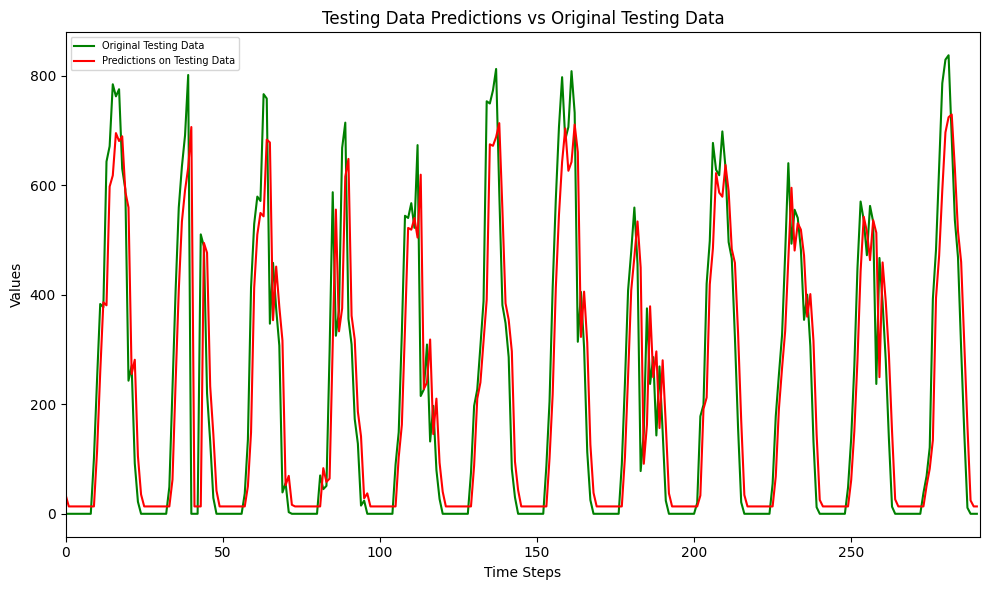

In [32]:
# Looking at the testing data closer

# Define the start and end of the testing data
test_start = len(trainPredict) + (look_back * 2) + 1
test_end = len(df_lstm) - 1

# Extract the original testing data
original_test_data = scaler.inverse_transform(df_lstm)[test_start:test_end]

# Shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[test_start:test_end, :] = testPredict

# Plot only the testing predictions and original testing data
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
plt.plot(original_test_data, 'g', label='Original Testing Data')  # Original test data
plt.plot(testPredict, 'r', label='Predictions on Testing Data')   # Test predictions

# Zoom in on the testing portion
plt.xlim(0, len(original_test_data))  # Limit x-axis to the testing range
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Testing Data Predictions vs Original Testing Data")
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()


# Global Horizontal Irradiance Forecasting

In [38]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [33]:
# define input sequence
df_2009_to_forecast = df_2009_irradiance.iloc[-293:]
df_2009_to_forecast = df_2009_to_forecast.reset_index(drop=True)
df_2009_to_train = df_2009_irradiance.iloc[:-293]

df_lstm = df_2009_to_train.values
df_lstm = df_lstm.astype('float32')

raw_seq = df_lstm

# choose a number of time steps
n_steps = 20

# split into samples
X, y = split_sequence(raw_seq, n_steps)

# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[[  0.]
 [  0.]
 [  0.]
 [ 15.]
 [140.]
 [301.]
 [466.]
 [627.]
 [765.]
 [846.]
 [883.]
 [826.]
 [717.]
 [590.]
 [574.]
 [219.]
 [181.]
 [170.]
 [ 33.]
 [  0.]] [0.]
[[  0.]
 [  0.]
 [ 15.]
 [140.]
 [301.]
 [466.]
 [627.]
 [765.]
 [846.]
 [883.]
 [826.]
 [717.]
 [590.]
 [574.]
 [219.]
 [181.]
 [170.]
 [ 33.]
 [  0.]
 [  0.]] [0.]
[[  0.]
 [ 15.]
 [140.]
 [301.]
 [466.]
 [627.]
 [765.]
 [846.]
 [883.]
 [826.]
 [717.]
 [590.]
 [574.]
 [219.]
 [181.]
 [170.]
 [ 33.]
 [  0.]
 [  0.]
 [  0.]] [0.]
[[ 15.]
 [140.]
 [301.]
 [466.]
 [627.]
 [765.]
 [846.]
 [883.]
 [826.]
 [717.]
 [590.]
 [574.]
 [219.]
 [181.]
 [170.]
 [ 33.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]] [0.]
[[140.]
 [301.]
 [466.]
 [627.]
 [765.]
 [846.]
 [883.]
 [826.]
 [717.]
 [590.]
 [574.]
 [219.]
 [181.]
 [170.]
 [ 33.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]] [0.]
[[301.]
 [466.]
 [627.]
 [765.]
 [846.]
 [883.]
 [826.]
 [717.]
 [590.]
 [574.]
 [219.]
 [181.]
 [170.]
 [ 33.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]] [0.]
[[46

In [34]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=300, verbose=2)

Epoch 1/300


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 - 3s - 72ms/step - loss: 108679.1719
Epoch 2/300
36/36 - 1s - 26ms/step - loss: 58899.8750
Epoch 3/300
36/36 - 1s - 26ms/step - loss: 76480.1641
Epoch 4/300
36/36 - 1s - 26ms/step - loss: 266404.1250
Epoch 5/300
36/36 - 1s - 26ms/step - loss: 42227.5703
Epoch 6/300
36/36 - 1s - 26ms/step - loss: 45978.9297
Epoch 7/300
36/36 - 1s - 26ms/step - loss: 50224.2383
Epoch 8/300
36/36 - 1s - 26ms/step - loss: 52638.7148
Epoch 9/300
36/36 - 1s - 25ms/step - loss: 51369.9219
Epoch 10/300
36/36 - 1s - 26ms/step - loss: 40936.9102
Epoch 11/300
36/36 - 1s - 26ms/step - loss: 43625.6641
Epoch 12/300
36/36 - 1s - 26ms/step - loss: 89776.5625
Epoch 13/300
36/36 - 1s - 26ms/step - loss: 106066.2500
Epoch 14/300
36/36 - 1s - 26ms/step - loss: 61998.2617
Epoch 15/300
36/36 - 1s - 26ms/step - loss: 43337.3477
Epoch 16/300
36/36 - 1s - 26ms/step - loss: 40883.5742
Epoch 17/300
36/36 - 1s - 26ms/step - loss: 39079.2539
Epoch 18/300
36/36 - 1s - 25ms/step - loss: 37117.8438
Epoch 19/300
36/36 - 1s - 26

In [35]:
# Prediction demonstration
x_input = array(df_2009_to_forecast[0:n_steps])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

print(x_input)
print(yhat)

[[[ 21.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]
  [101.]
  [246.]
  [383.]
  [377.]
  [643.]
  [671.]
  [784.]
  [762.]
  [775.]
  [630.]]]
[[533.5743]]


In [36]:
# Getting the forecasting predictions for every hour of July 31st

prediction_list = [] # Initialize empty array to store predictions

# Extracting float values from the nested structure
to_forecast_values = [item[0] for item in df_lstm[-n_steps:]]

# Feeding the model the initial data
for i in range(n_steps):

    prediction_list.append(to_forecast_values[i])

for i in range(293):

    x_input = array(prediction_list[i:i+n_steps])
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=2)

    prediction_list.append(yhat[0][0])

1/1 - 0s - 96ms/step
1/1 - 0s - 81ms/step
1/1 - 0s - 77ms/step
1/1 - 0s - 82ms/step
1/1 - 0s - 104ms/step
1/1 - 0s - 83ms/step
1/1 - 0s - 81ms/step
1/1 - 0s - 80ms/step
1/1 - 0s - 101ms/step
1/1 - 0s - 97ms/step
1/1 - 0s - 100ms/step
1/1 - 0s - 76ms/step
1/1 - 0s - 78ms/step
1/1 - 0s - 80ms/step
1/1 - 0s - 86ms/step
1/1 - 0s - 84ms/step
1/1 - 0s - 77ms/step
1/1 - 0s - 94ms/step
1/1 - 0s - 83ms/step
1/1 - 0s - 84ms/step
1/1 - 0s - 84ms/step
1/1 - 0s - 104ms/step
1/1 - 0s - 76ms/step
1/1 - 0s - 77ms/step
1/1 - 0s - 99ms/step
1/1 - 0s - 101ms/step
1/1 - 0s - 83ms/step
1/1 - 0s - 83ms/step
1/1 - 0s - 95ms/step
1/1 - 0s - 100ms/step
1/1 - 0s - 83ms/step
1/1 - 0s - 85ms/step
1/1 - 0s - 82ms/step
1/1 - 0s - 75ms/step
1/1 - 0s - 93ms/step
1/1 - 0s - 85ms/step
1/1 - 0s - 99ms/step
1/1 - 0s - 84ms/step
1/1 - 0s - 89ms/step
1/1 - 0s - 79ms/step
1/1 - 0s - 80ms/step
1/1 - 0s - 88ms/step
1/1 - 0s - 102ms/step
1/1 - 0s - 88ms/step
1/1 - 0s - 87ms/step
1/1 - 0s - 103ms/step
1/1 - 0s - 94ms/step
1/1 -

In [37]:
filtered_float_values = prediction_list[n_steps:]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(filtered_float_values, df_2009_to_forecast))

# Print RMSE
print("RMSE:", rmse)

RMSE: 2073460033129.035


Text(0.5, 1.0, 'Forecasting the Horizontal Global Irradiance with look_back = 20')

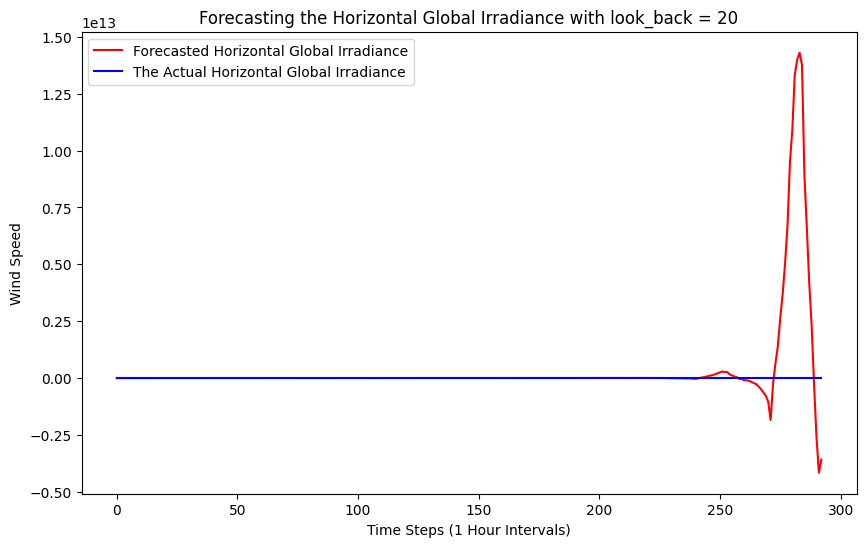

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_float_values, 'r-', label='Forecasted Horizontal Global Irradiance')
plt.plot(df_2009_to_forecast, 'b', label='The Actual Horizontal Global Irradiance')
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Speed')
plt.legend()
plt.title("Forecasting the Horizontal Global Irradiance with look_back = " + str(n_steps))

# Wind Speed Prediction With Multiple Features
So far, LSTM was only able to predict from a sequential time-series data without considering any other features. <br>
Here, the LSTM model will be fed with additional data to find correlations. <br>
The additional data will be the 10-m wind direction and the surface (air) pressure.

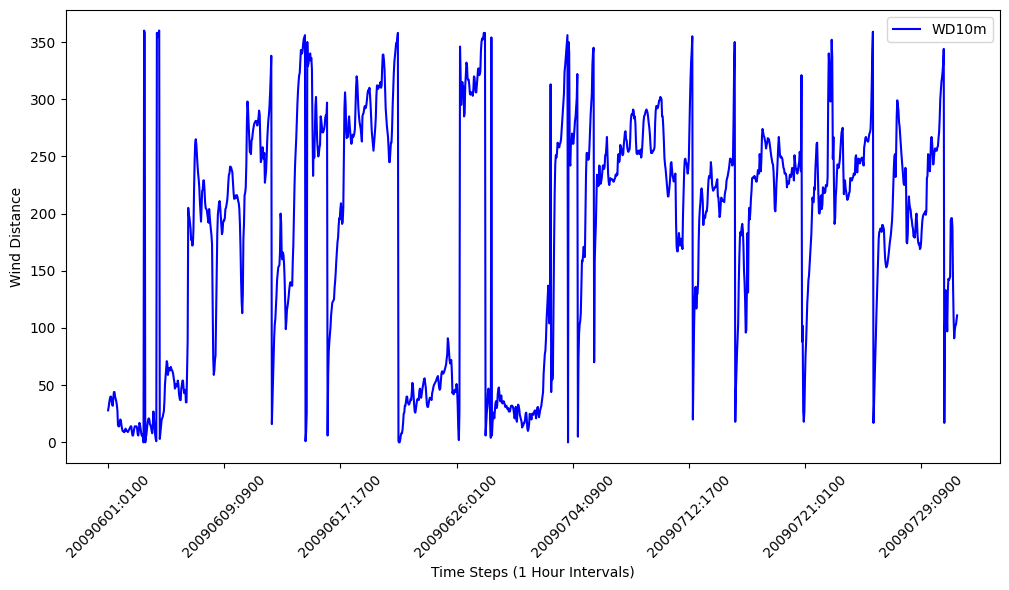

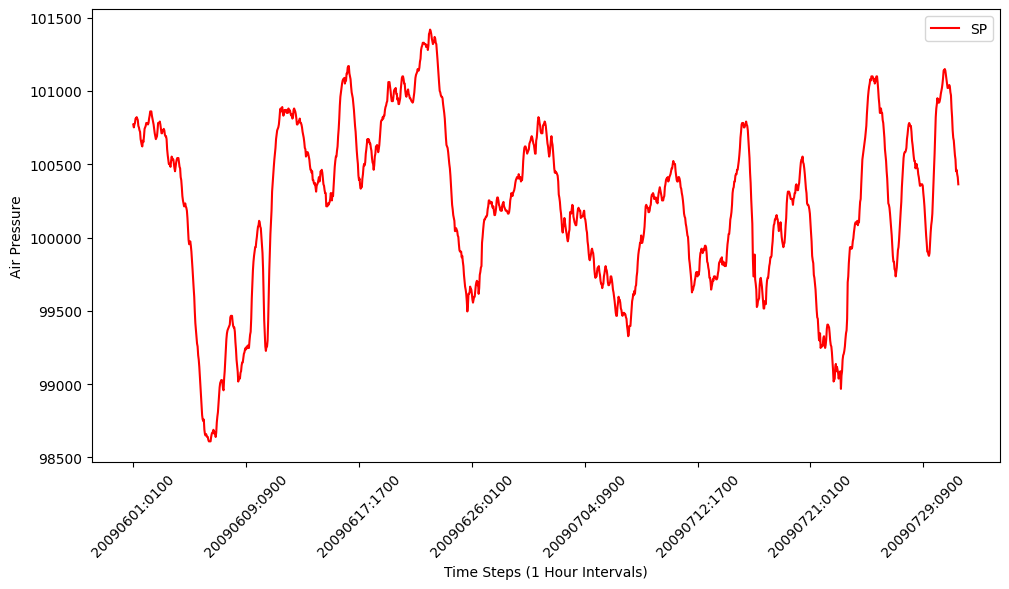

In [20]:
# Line plots of 10m wind direction and air pressure

# Plot the line chart of wind distance
ax = df_2009.plot(x='time(UTC)', y='WD10m', color='b', kind='line', figsize=(10, 6))

# Adjust x-axis ticks to display fewer labels
xtick_positions = ax.get_xticks()  # Get the default tick positions

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Wind Distance')
plt.show()

# Plot the line chart of air pressure
ax = df_2009.plot(x='time(UTC)', y='SP', color='r', kind='line', figsize=(10, 6))

# Adjust x-axis ticks to display fewer labels
xtick_positions = ax.get_xticks()  # Get the default tick positions

plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.tight_layout()  # Adjust layout to prevent clipping
plt.xlabel('Time Steps (1 Hour Intervals)')
plt.ylabel('Air Pressure')
plt.show()

In [21]:
df_2009_wind = df_2009_timeless.iloc[:, [6, 7, 8]]

df_2009_wind

,WS10m,WD10m,SP
0,2.90,28.0,100771.0
1,2.75,31.0,100751.0
2,2.60,35.0,100771.0
3,2.45,38.0,100781.0
4,2.30,40.0,100811.0
...,...,...,...
1458,1.62,98.0,100452.0
1459,1.76,102.0,100462.0
1460,1.91,103.0,100432.0
1461,2.05,107.0,100412.0


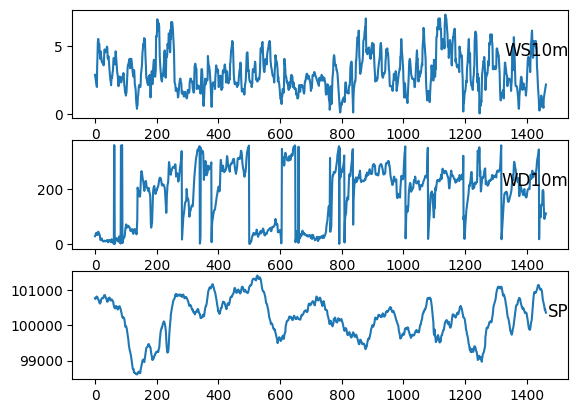

In [22]:
# Creating separate subplots for each series
values = df_2009_wind.values

# Specify columns to plot
groups = [0, 1, 2]
i = 1

# Plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df_2009_wind.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [36]:
# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [23]:
# Load dataset
values = df_2009_wind.values

# Integer encode direction
encoder = LabelEncoder()
values[:,2] = encoder.fit_transform(values[:,2])

# Ensure all data is float
values = values.astype('float32')

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)   var2(t)   var3(t)
1   0.390884   0.077778   0.780877  0.370166  0.086111  0.772908
2   0.370166   0.086111   0.772908  0.349448  0.097222  0.780877
3   0.349448   0.097222   0.780877  0.328729  0.105556  0.784861
4   0.328729   0.105556   0.784861  0.308011  0.111111  0.796813
5   0.308011   0.111111   0.796813  0.288674  0.111111  0.796813


In [24]:
# Drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.390884   0.077778   0.780877  0.370166
2   0.370166   0.086111   0.772908  0.349448
3   0.349448   0.097222   0.780877  0.328729
4   0.328729   0.105556   0.784861  0.308011
5   0.308011   0.111111   0.796813  0.288674


In [25]:
np.shape(reframed)

(1462, 4)

In [26]:
# np.savetxt(r"D:\Users\ugurhan\Desktop\LSTM Model\test_values.txt", reframed.values, fmt='%f')

In [27]:
# Split into train and test sets using iloc
train_size = int(len(reframed) * 0.80)
test_size = len(reframed) - train_size

train, test = reframed.iloc[0:train_size, :], reframed.iloc[train_size:len(reframed), :]
print(len(train), len(test))

# Split into input and outputs
train_X, train_y = train.iloc[:, :-1].values, train.iloc[:, -1].values
test_X, test_y = test.iloc[:, :-1].values, test.iloc[:, -1].values

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

1169 293
(1169, 1, 3) (1169,) (293, 1, 3) (293,)


Epoch 1/50


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 - 2s - 138ms/step - loss: 0.3172 - val_loss: 0.2413
Epoch 2/50
17/17 - 0s - 28ms/step - loss: 0.2069 - val_loss: 0.1670
Epoch 3/50
17/17 - 0s - 28ms/step - loss: 0.1514 - val_loss: 0.1441
Epoch 4/50
17/17 - 0s - 28ms/step - loss: 0.1434 - val_loss: 0.1418
Epoch 5/50
17/17 - 0s - 27ms/step - loss: 0.1397 - val_loss: 0.1371
Epoch 6/50
17/17 - 0s - 27ms/step - loss: 0.1343 - val_loss: 0.1321
Epoch 7/50
17/17 - 0s - 28ms/step - loss: 0.1291 - val_loss: 0.1274
Epoch 8/50
17/17 - 0s - 28ms/step - loss: 0.1241 - val_loss: 0.1227
Epoch 9/50
17/17 - 0s - 27ms/step - loss: 0.1190 - val_loss: 0.1178
Epoch 10/50
17/17 - 0s - 27ms/step - loss: 0.1135 - val_loss: 0.1126
Epoch 11/50
17/17 - 0s - 27ms/step - loss: 0.1076 - val_loss: 0.1070
Epoch 12/50
17/17 - 0s - 27ms/step - loss: 0.1014 - val_loss: 0.1011
Epoch 13/50
17/17 - 0s - 28ms/step - loss: 0.0949 - val_loss: 0.0947
Epoch 14/50
17/17 - 0s - 27ms/step - loss: 0.0879 - val_loss: 0.0878
Epoch 15/50
17/17 - 0s - 26ms/step - loss: 0.0802 - v

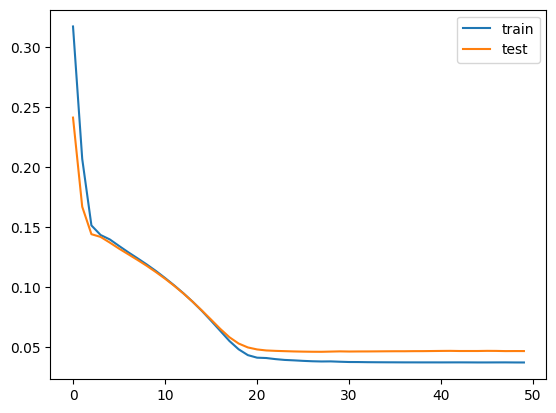

In [28]:
# Design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [29]:
# Make a prediction
testPredict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
trainPredict = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

# Invert scaling for forecast
inv_testPredict = np.concatenate((testPredict, test_X[:, 1:]), axis=1)
inv_testPredict = scaler.inverse_transform(inv_testPredict)
inv_testPredict = inv_testPredict[:,0]

inv_trainPredict = np.concatenate((trainPredict, train_X[:, 1:]), axis=1)
inv_trainPredict = scaler.inverse_transform(inv_trainPredict)
inv_trainPredict = inv_trainPredict[:,0]

# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

train_y = train_y.reshape((len(train_y), 1))
inv_y_train = np.concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_testPredict))
print('Test RMSE: %.3f' % rmse)
rmse = np.sqrt(mean_squared_error(inv_y_train, inv_trainPredict))
print('Train RMSE: %.3f' % rmse)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE: 0.485
Train RMSE: 0.385


In [30]:
look_back = 1

In [31]:
np.shape(trainPredict)

(1169, 1)

In [32]:
# # Shift train predictions for plotting
# trainPredictPlot = np.empty_like(reframed)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# # Shift test predictions for plotting
# testPredictPlot = np.empty_like(reframed)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict):len(reframed)-1, :] = testPredict

# # Plot baseline and predictions
# plt.plot(scaler.inverse_transform(reframed), 'g', label='Original Dataset')
# plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
# plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')
# plt.legend(fontsize=7)
# plt.show()

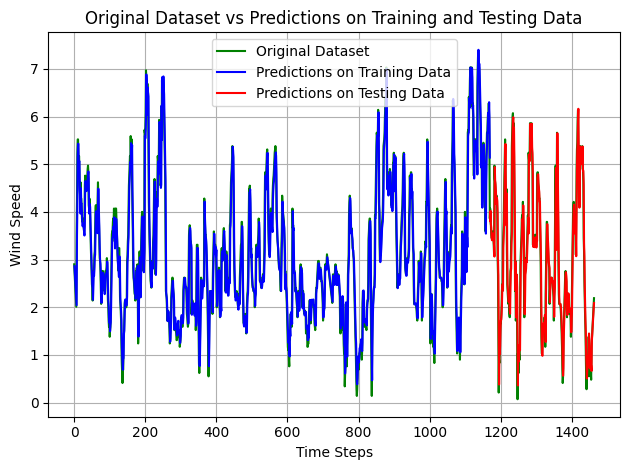

In [33]:
# Create arrays for plotting
trainPredictPlot = np.empty_like(df_2009_wind['WS10m'].values)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:look_back + len(inv_trainPredict)] = inv_trainPredict

testPredictPlot = np.empty_like(df_2009_wind['WS10m'].values)
testPredictPlot[:] = np.nan
testPredictPlot[look_back + len(inv_trainPredict):] = inv_testPredict

# Plot the original dataset
plt.plot(df_2009_wind['WS10m'], 'g', label='Original Dataset')

# Plot the predictions
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')

# Add labels and legends
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed')
plt.title('Original Dataset vs Predictions on Training and Testing Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

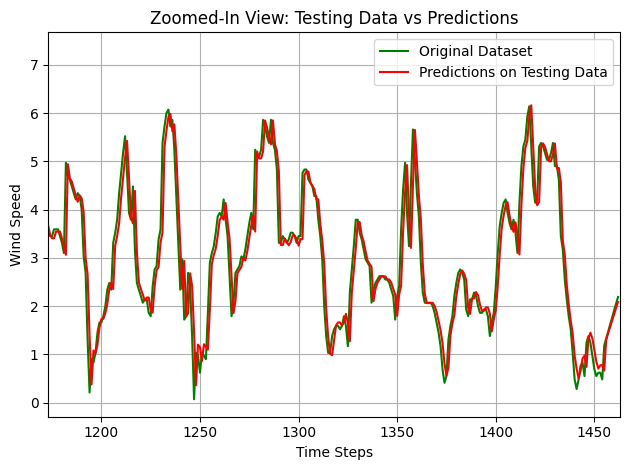

In [34]:
# Plot the original dataset
plt.plot(df_2009_wind['WS10m'], 'g', label='Original Dataset')

# Plot the predictions
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')

# Add labels and legends
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed')
plt.title('Zoomed-In View: Testing Data vs Predictions')
plt.legend()

# Zoom in on the testing data
test_start_index = look_back + len(inv_trainPredict) + (look_back*2) + 1
plt.xlim(test_start_index, len(df_2009_wind['WS10m']))  # Focus on testing period

plt.grid()
plt.tight_layout()
plt.show()

# Other Predictions With Multiple Time Steps

In [164]:
df_2009_wind = df_2009_timeless.iloc[:, [6, 7, 8]]

df_2009_wind

,WS10m,WD10m,SP
0,2.90,28.0,100771.0
1,2.75,31.0,100751.0
2,2.60,35.0,100771.0
3,2.45,38.0,100781.0
4,2.30,40.0,100811.0
...,...,...,...
1458,1.62,98.0,100452.0
1459,1.76,102.0,100462.0
1460,1.91,103.0,100432.0
1461,2.05,107.0,100412.0


In [165]:
# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	
	# Input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
	# Forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	# Put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	
	# Drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [166]:
# Load dataset
dataset = df_2009_wind
values = dataset.values

# Integer encode direction
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])

# Ensure all data is float
values = values.astype('float32')

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Specify the number of time steps and features
n_steps = 5
n_features = 3

# Frame as supervised learning
reframed = series_to_supervised(scaled, n_steps, 1)
print(reframed.shape)

(1458, 18)


In [167]:
# Split into train and test sets using iloc
train_size = int(len(reframed) * 0.80)
test_size = len(reframed) - train_size

train, test = reframed.iloc[0:train_size, :], reframed.iloc[train_size:len(reframed), :]
print(len(train), len(test))

# Split into input and outputs
n_obs = n_steps * n_features
train_X, train_y = train.iloc[:, :n_obs].values, train.iloc[:, -n_features].values
test_X, test_y = test.iloc[:, :n_obs].values, test.iloc[:, -n_features].values
print(train_X.shape, len(train_X), train_y.shape)

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_steps, n_features))
test_X = test_X.reshape((test_X.shape[0], n_steps, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

1166 292
(1166, 15) 1166 (1166,)
(1166, 5, 3) (1166,) (292, 5, 3) (292,)


Epoch 1/50


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 - 3s - 147ms/step - loss: 0.3483 - val_loss: 0.1980
Epoch 2/50
17/17 - 0s - 24ms/step - loss: 0.2029 - val_loss: 0.1846
Epoch 3/50
17/17 - 1s - 30ms/step - loss: 0.1644 - val_loss: 0.1636
Epoch 4/50
17/17 - 1s - 30ms/step - loss: 0.1447 - val_loss: 0.1451
Epoch 5/50
17/17 - 1s - 31ms/step - loss: 0.1258 - val_loss: 0.1284
Epoch 6/50
17/17 - 1s - 30ms/step - loss: 0.1099 - val_loss: 0.1161
Epoch 7/50
17/17 - 1s - 30ms/step - loss: 0.1001 - val_loss: 0.1147
Epoch 8/50
17/17 - 1s - 32ms/step - loss: 0.0987 - val_loss: 0.1132
Epoch 9/50
17/17 - 1s - 31ms/step - loss: 0.0969 - val_loss: 0.1111
Epoch 10/50
17/17 - 1s - 32ms/step - loss: 0.0956 - val_loss: 0.1099
Epoch 11/50
17/17 - 1s - 31ms/step - loss: 0.0949 - val_loss: 0.1092
Epoch 12/50
17/17 - 1s - 31ms/step - loss: 0.0940 - val_loss: 0.1083
Epoch 13/50
17/17 - 1s - 29ms/step - loss: 0.0927 - val_loss: 0.1061
Epoch 14/50
17/17 - 1s - 31ms/step - loss: 0.0911 - val_loss: 0.1045
Epoch 15/50
17/17 - 1s - 30ms/step - loss: 0.0901 - v

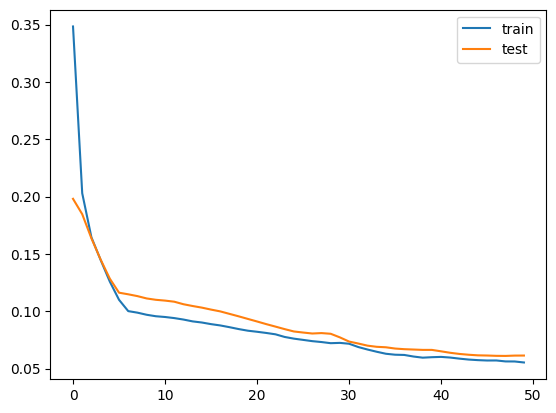

In [168]:
# Design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [169]:
# Make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_steps*n_features))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -2:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -2:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Test RMSE: 11.059


# Wind Speed Forecasting With Multiple Features (Mistakes Were Made)
With the multiple feature model working, an analysis of the forecasting model is done to see the effectiveness of multiple features.

In [39]:
df_2009_wind = df_2009_timeless.iloc[:, [6, 7, 8]]

df_2009_wind

,WS10m,WD10m,SP
0,2.90,28.0,100771.0
1,2.75,31.0,100751.0
2,2.60,35.0,100771.0
3,2.45,38.0,100781.0
4,2.30,40.0,100811.0
...,...,...,...
1458,1.62,98.0,100452.0
1459,1.76,102.0,100462.0
1460,1.91,103.0,100432.0
1461,2.05,107.0,100412.0


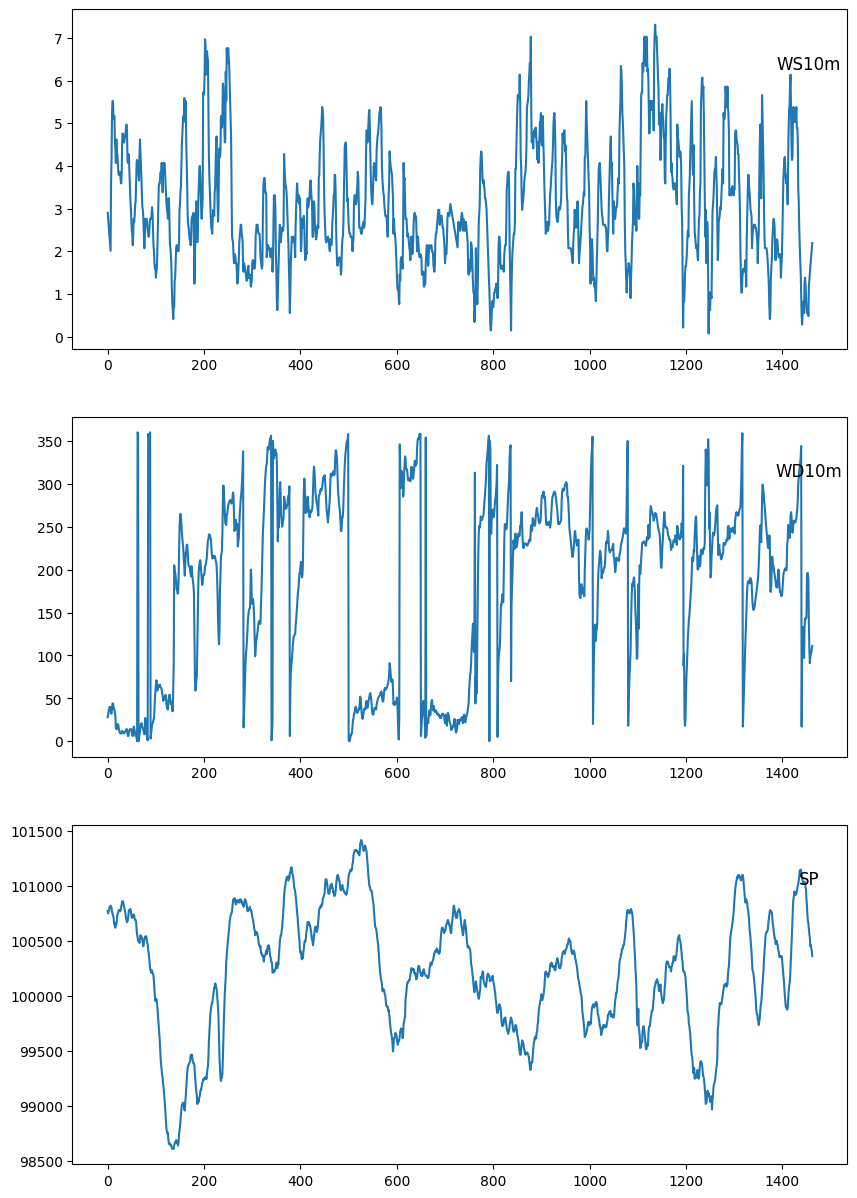

In [40]:
# Creating separate subplots for each series
values = df_2009_wind.values

# Specify columns to plot
groups = [0, 1, 2]
i = 1

# Plot each column
plt.figure(figsize=(10, 15))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df_2009_wind.columns[group], y=0.8, x=0.95)
	i += 1
plt.show()

In [41]:
# Convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	
	# Input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	
	# Forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	# Put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	
	# Drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [42]:
# Load dataset
values = df_2009_wind.values

# Integer encode direction
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])

# Ensure all data is float
values = values.astype('float32')

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Specify the number of time steps and features
look_back = 1
n_features = 3

# Frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)   var2(t)   var3(t)
1   0.515625   0.077778   0.769588  0.476562  0.086111  0.762466
2   0.476562   0.086111   0.762466  0.437500  0.097222  0.769588
3   0.437500   0.097222   0.769588  0.398438  0.105556  0.773151
4   0.398438   0.105556   0.773151  0.359375  0.111111  0.783833
5   0.359375   0.111111   0.783833  0.312500  0.111111  0.783833


In [43]:
# Drop columns we don't want to predict
reframed.drop(reframed.columns[[4, 5]], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)   var1(t)
1   0.515625   0.077778   0.769588  0.476562
2   0.476562   0.086111   0.762466  0.437500
3   0.437500   0.097222   0.769588  0.398438
4   0.398438   0.105556   0.773151  0.359375
5   0.359375   0.111111   0.783833  0.312500


In [44]:
np.shape(reframed)

(1462, 4)

In [45]:
# Split into train and test sets using iloc
train_size = int(len(reframed) * 0.80)
test_size = len(reframed) - train_size

train, test = reframed.iloc[0:train_size, :], reframed.iloc[train_size:len(reframed), :]
print(len(train), len(test))

# Split into input and outputs
n_obs = look_back * n_features
train_X, train_y = train.iloc[:, :n_obs].values, train.iloc[:, -n_features].values
test_X, test_y = test.iloc[:, :n_obs].values, test.iloc[:, -n_features].values
print(train_X.shape, len(train_X), train_y.shape)

# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], look_back, n_features))
test_X = test_X.reshape((test_X.shape[0], look_back, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

1169 293
(1169, 3) 1169 (1169,)
(1169, 1, 3) (1169,) (293, 1, 3) (293,)


Epoch 1/100


d:\Users\ugurhan\Desktop\LSTM Model\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 - 2s - 50ms/step - loss: 0.3671 - val_loss: 0.3164
Epoch 2/100
49/49 - 1s - 11ms/step - loss: 0.2300 - val_loss: 0.0905
Epoch 3/100
49/49 - 0s - 10ms/step - loss: 0.1588 - val_loss: 0.0706
Epoch 4/100
49/49 - 0s - 10ms/step - loss: 0.1460 - val_loss: 0.0683
Epoch 5/100
49/49 - 1s - 11ms/step - loss: 0.1164 - val_loss: 0.0478
Epoch 6/100
49/49 - 1s - 11ms/step - loss: 0.0878 - val_loss: 0.0326
Epoch 7/100
49/49 - 1s - 11ms/step - loss: 0.0538 - val_loss: 0.0142
Epoch 8/100
49/49 - 1s - 11ms/step - loss: 0.0245 - val_loss: 0.0064
Epoch 9/100
49/49 - 1s - 11ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 10/100
49/49 - 1s - 12ms/step - loss: 0.0121 - val_loss: 0.0066
Epoch 11/100
49/49 - 1s - 11ms/step - loss: 0.0112 - val_loss: 0.0048
Epoch 12/100
49/49 - 1s - 11ms/step - loss: 0.0139 - val_loss: 0.0087
Epoch 13/100
49/49 - 1s - 11ms/step - loss: 0.0108 - val_loss: 0.0045
Epoch 14/100
49/49 - 1s - 12ms/step - loss: 0.0148 - val_loss: 0.0103
Epoch 15/100
49/49 - 1s - 11ms/step - los

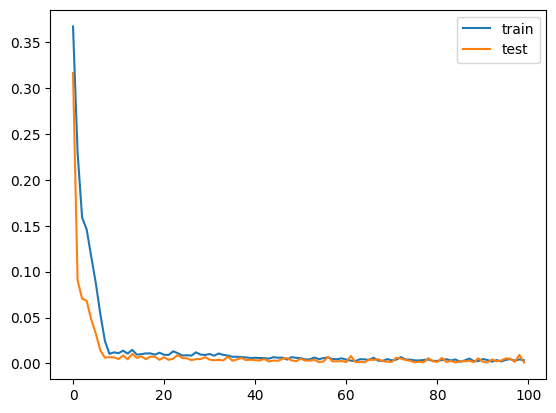

In [46]:
# Design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=24, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [47]:
# Make a prediction
testPredict = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]*look_back))
trainPredict = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]*look_back))

# Invert scaling for forecast
inv_testPredict = np.concatenate((testPredict, test_X[:, -2:]), axis=1)
inv_testPredict = scaler.inverse_transform(inv_testPredict)
inv_testPredict = inv_testPredict[:,0]

inv_trainPredict = np.concatenate((trainPredict, train_X[:, -2:]), axis=1)
inv_trainPredict = scaler.inverse_transform(inv_trainPredict)
inv_trainPredict = inv_trainPredict[:,0]

# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -2:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

train_y = train_y.reshape((len(train_y), 1))
inv_y_train = np.concatenate((train_y, train_X[:, -2:]), axis=1)
inv_y_train = scaler.inverse_transform(inv_y_train)
inv_y_train = inv_y_train[:,0]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_testPredict))
print('Test RMSE: %.3f' % rmse)
rmse = np.sqrt(mean_squared_error(inv_y_train, inv_trainPredict))
print('Train RMSE: %.3f' % rmse)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Test RMSE: 0.189
Train RMSE: 0.202


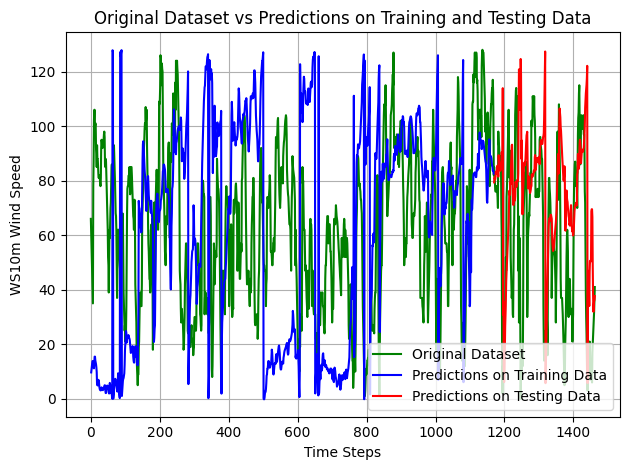

In [48]:
# Create arrays for plotting
trainPredictPlot = np.empty_like(df_2009_wind['WS10m'].values)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:look_back + len(inv_trainPredict)] = inv_trainPredict

testPredictPlot = np.empty_like(df_2009_wind['WS10m'].values)
testPredictPlot[:] = np.nan
testPredictPlot[1 + len(inv_trainPredict):] = inv_testPredict

# Plot the original dataset
plt.plot(df_2009_wind['WS10m'], 'g', label='Original Dataset')

# Plot the predictions
plt.plot(trainPredictPlot, 'b', label='Predictions on Training Data')
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')

# Add labels and legends
plt.xlabel('Time Steps')
plt.ylabel('WS10m Wind Speed')
plt.title('Original Dataset vs Predictions on Training and Testing Data')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

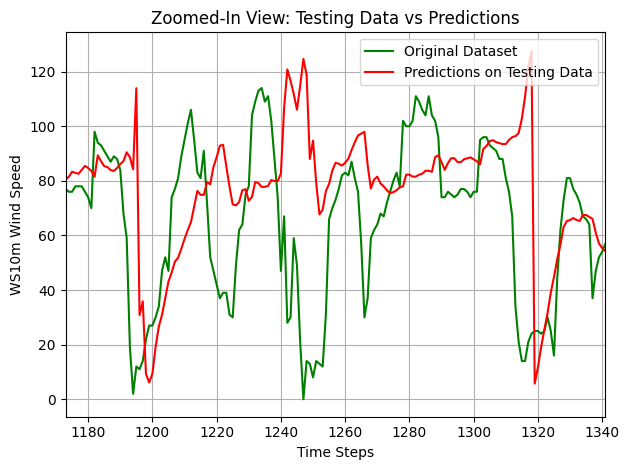

In [49]:
# Plot the original dataset
plt.plot(df_2009_wind['WS10m'], 'g', label='Original Dataset')

# Plot the predictions
plt.plot(testPredictPlot, 'r', label='Predictions on Testing Data')

# Add labels and legends
plt.xlabel('Time Steps')
plt.ylabel('WS10m Wind Speed')
plt.title('Zoomed-In View: Testing Data vs Predictions')
plt.legend()

# Zoom in on the testing data
test_start_index = look_back + len(inv_trainPredict) + (look_back*2) + 1
plt.xlim(test_start_index, test_start_index+24*7)  # Focus on the first week

plt.grid()
plt.tight_layout()
plt.show()